In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as mpl

In [33]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.076508,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,90.976578,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.637405,48485500


In [4]:
ma_100_days = data.Close.rolling(100).mean()

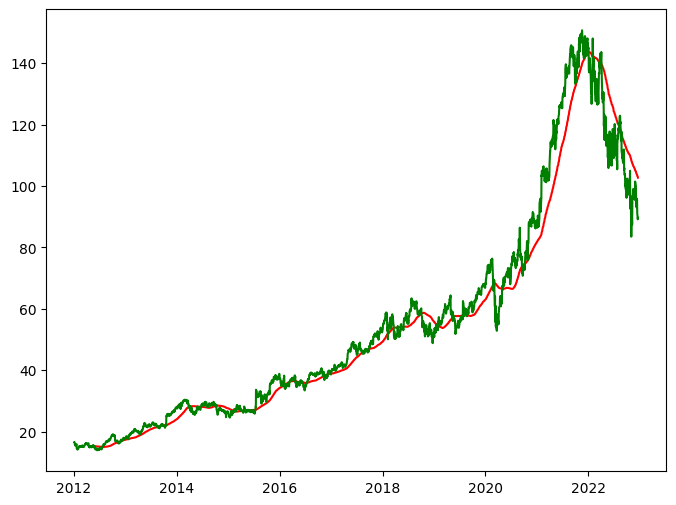

In [5]:

mpl.figure(figsize=(8,6))
mpl.plot(ma_100_days, 'r')
mpl.plot(data.Close,'g')
mpl.show()

In [6]:
ma_200_days = data.Close.rolling(200).mean()

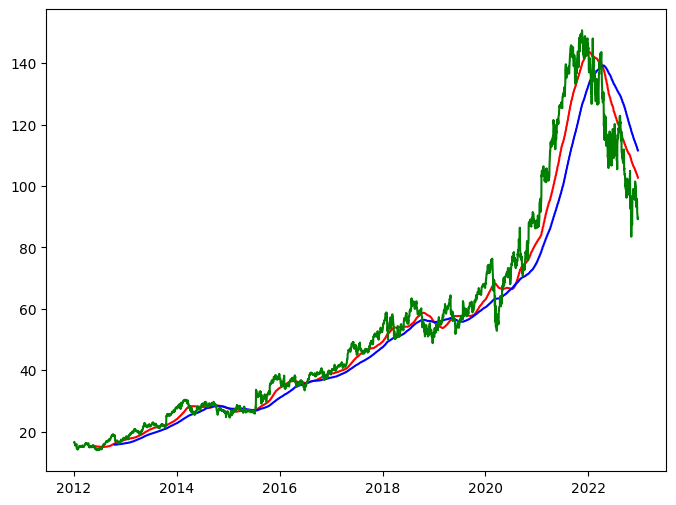

In [7]:
mpl.figure(figsize=(8,6))
mpl.plot(ma_100_days, 'r')
mpl.plot(ma_200_days, 'b')
mpl.plot(data.Close, 'g')
mpl.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [10]:
data_train.shape[0]

2208

In [11]:
data_test.shape[0]

553

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_test)

In [14]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100:i])
    y.append(data_train_scale[i,0])

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, 
               input_shape =((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

c:\Users\gjman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - loss: 0.3503
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.0513
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 0.0308
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - loss: 0.0247
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0269
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.0243
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0219
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - loss: 0.0184
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 0.0174
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 0.0228
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - loss: 0.0204
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0152
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0191
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.0194
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - l

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
pas_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([pas_100_days, data_test],ignore_index = True)

In [23]:
data_test_scale = scaler.fit_transform(data_test)

In [24]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100:i])
    y.append(data_train_scale[i,0])
x,y = np.array(x), np.array(y)

In [25]:
y_predict = model.predict(x)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step


In [26]:
scale = 1/scaler.scale_

In [27]:
y_predict = y_predict*scale

In [28]:
y =  y*scale

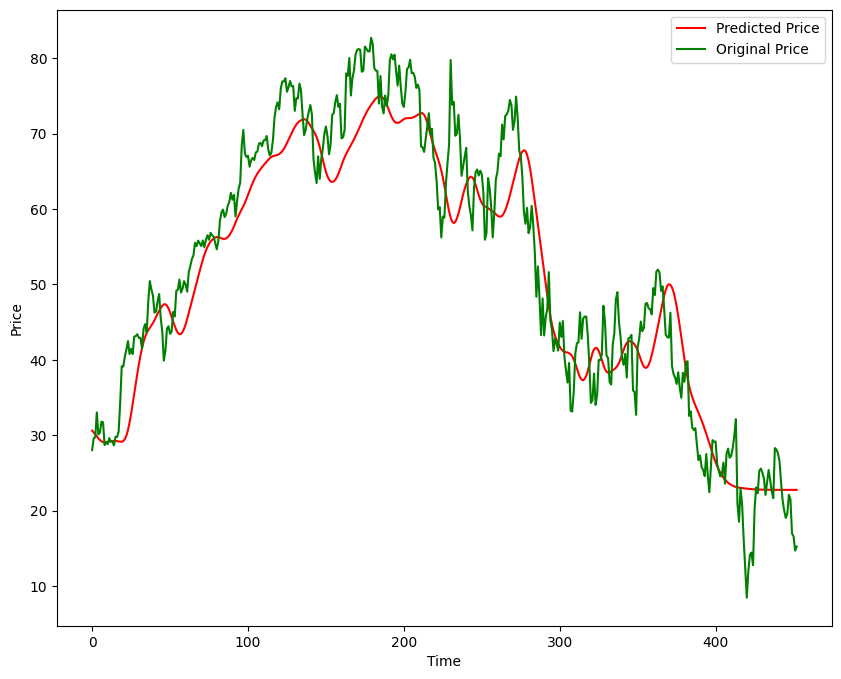

In [29]:

mpl.figure(figsize=(10, 8))  # Corrected 'figsize'
mpl.plot(y_predict, 'r', label='Predicted Price')  # Corrected 'label'
mpl.plot(y, 'g', label='Original Price')
mpl.xlabel('Time')
mpl.ylabel('Price')
mpl.legend()
mpl.show()

In [30]:
model.save('Stock Predictions Model.keras')